# 05_TransferLearningFeatureExtraction_MobileNetV1

Written by: Rupesh Kumar Dey


Notebook used for model development and testing for Transfer Learning Models with Feature Extraction (no tuning) - MobileNetV1

## Importing required Libraries

In [1]:
!pip install seaborn
!pip install tensorflow_hub

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [2]:
# Importing python Libraries
# General / plotting libraries
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Image Libraries
from PIL import Image

# File System Libraries
import os
import sys
import copy
from copy import deepcopy

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, metrics, callbacks
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from HelperFunctions import *

In [3]:
# Setting project parent directory path 
projectPath = "/notebooks"

## Model Development - Transfer Learning Feature Extraction (MobileNetV1)
Models Developed and Tested
1. MobileNetV1


### 05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL: Transfer Learning with MobileNetV1 model on NORMAL Image

#### Dataset Loading 

In [4]:
# Defining path of dataset
train_path = "/Dataset/Dataset_NORMAL/train"
test_path = "/Dataset/Dataset_NORMAL/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [5]:
# Create MobileNetV1 
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_NORMAL = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
# Model summary
TransferLearningFeatureExtraction_MobileNetV1_NORMAL.summary()
# Train model
checkpointPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL.ckpt"
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_history = trainModel(TransferLearningFeatureExtraction_MobileNetV1_NORMAL, train_data, valid_data, checkpointPath ,epochs = 50)

2022-08-26 10:36:48.124704: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 10:36:48.172250: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 10:36:48.172700: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 10:36:48.174705: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 10:36:48.175067: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

17235968/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 1000)             4253864   
 nal)                                                            
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 batch_normalization_1 (Batc  (None, 1000)             4000      
 hNormalization)                                              

2022-08-26 10:36:54.112447: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


131/131 [==============================] - ETA: 0s - loss: 0.6584 - accuracy: 0.7474 - recall: 0.6797
Epoch 00001: val_accuracy improved from -inf to 0.35938, saving model to TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL.ckpt
131/131 [==============================] - 40s 279ms/step - loss: 0.6584 - accuracy: 0.7474 - recall: 0.6797 - val_loss: 1.5687 - val_accuracy: 0.3594 - val_recall: 0.0122
Epoch 2/50
131/131 [==============================] - ETA: 0s - loss: 0.4034 - accuracy: 0.8544 - recall: 0.8181
Epoch 00002: val_accuracy improved from 0.35938 to 0.40278, saving model to TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL.ckpt
131/131 [==============================] - 36s 272ms/step - loss: 0.4034 - accuracy: 0.8544 - recall: 0.8181 - val_loss: 1.4731 - val_accuracy: 0.4028 - val_recall: 0.2413
Epoch 

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 6s 9ms/step
Confusion Matrix:


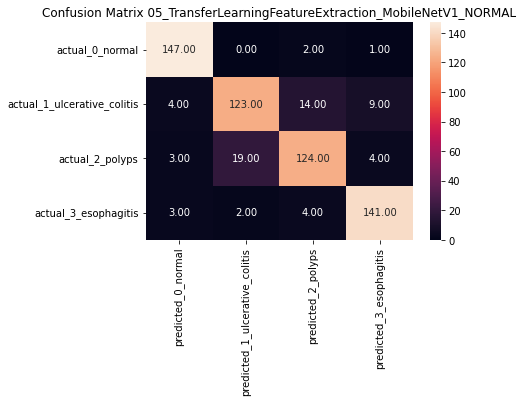

In [6]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_NORMAL = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL.ckpt"
loadModel(TransferLearningFeatureExtraction_MobileNetV1_NORMAL,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_MobileNetV1_NORMAL, test_data, "05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL/results/confusionMatrix/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL.jpg")

2022-08-26 11:06:51.821465: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://23574e41-58ec-42fa-954f-b421f5c02dd3/assets


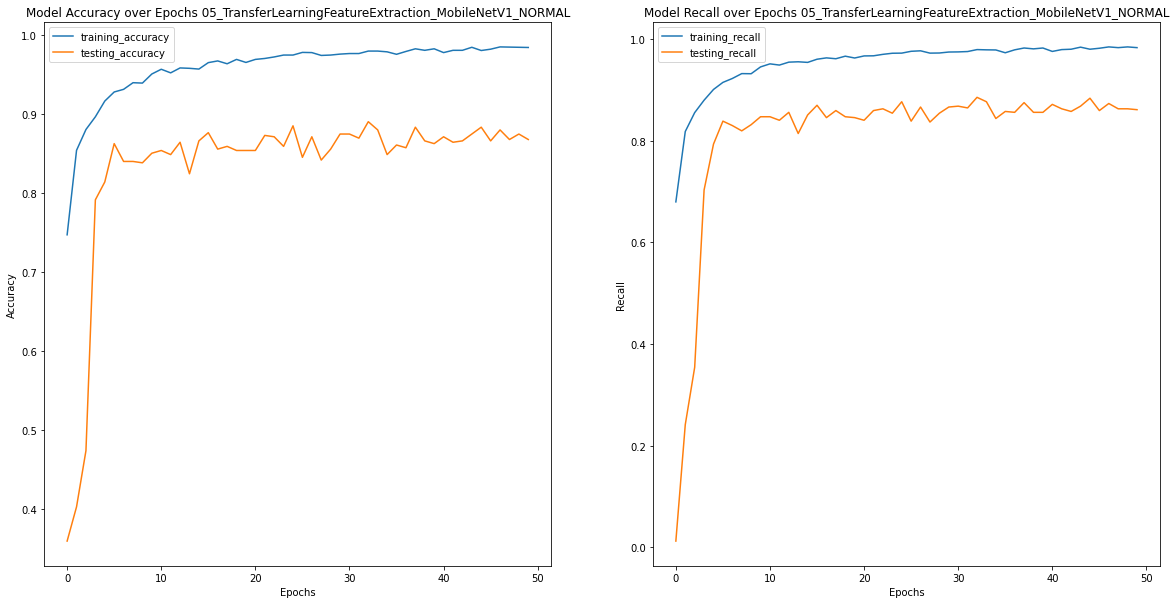

In [7]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL/results/classificationReport/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL.csv")
# Save model and training history
historyPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL/history/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL.npy"
save_history1(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_history, historyPath)
# Laod and plot model training history
history = load_history(historyPath)
plot_history(history, "05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL", location = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL/history/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL.jpg")

### 05_TransferLearningFeatureExtraction_MobileNetV1_CLAHE: Transfer Learning with MobileNetV1 model on CLAHE Image

#### Dataset Loading 

In [8]:
# Defining path of dataset
train_path = "/Dataset/Dataset_CLAHE/train"
test_path = "/Dataset/Dataset_CLAHE/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [9]:
# Create MobileNetV1 
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_CLAHE = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
# Model summary
TransferLearningFeatureExtraction_MobileNetV1_CLAHE.summary()
# Train model
checkpointPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_CLAHE/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_CLAHE.ckpt"
TransferLearningFeatureExtraction_MobileNetV1_CLAHE_history = trainModel(TransferLearningFeatureExtraction_MobileNetV1_CLAHE, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 1000)             4253864   
 nal)                                                            
                                                                 
 batch_normalization_6 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 batch_normalization_7 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                           

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 5s 7ms/step
Confusion Matrix:


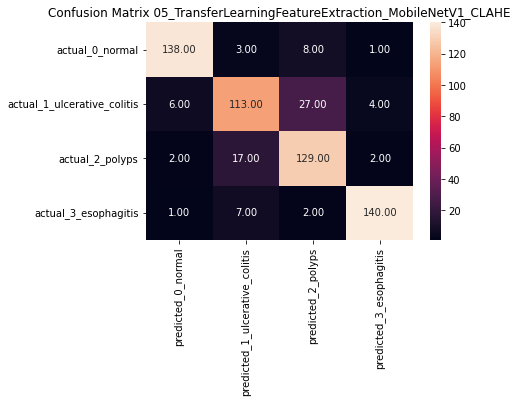

In [10]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_CLAHE = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_CLAHE/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_CLAHE.ckpt"
loadModel(TransferLearningFeatureExtraction_MobileNetV1_CLAHE,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_MobileNetV1_CLAHE, test_data, "05_TransferLearningFeatureExtraction_MobileNetV1_CLAHE" ,
                                                                data_class = ["0_normal_CLAHE",
                                                                              "1_ulcerative_colitis_CLAHE",
                                                                              "2_polyps_CLAHE",
                                                                              "3_esophagitis_CLAHE"],
                                                                location = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_CLAHE/results/confusionMatrix/05_TransferLearningFeatureExtraction_MobileNetV1_CLAHE.jpg")

INFO:tensorflow:Assets written to: ram://66787736-cb4e-4550-abd4-279345b5a3d5/assets


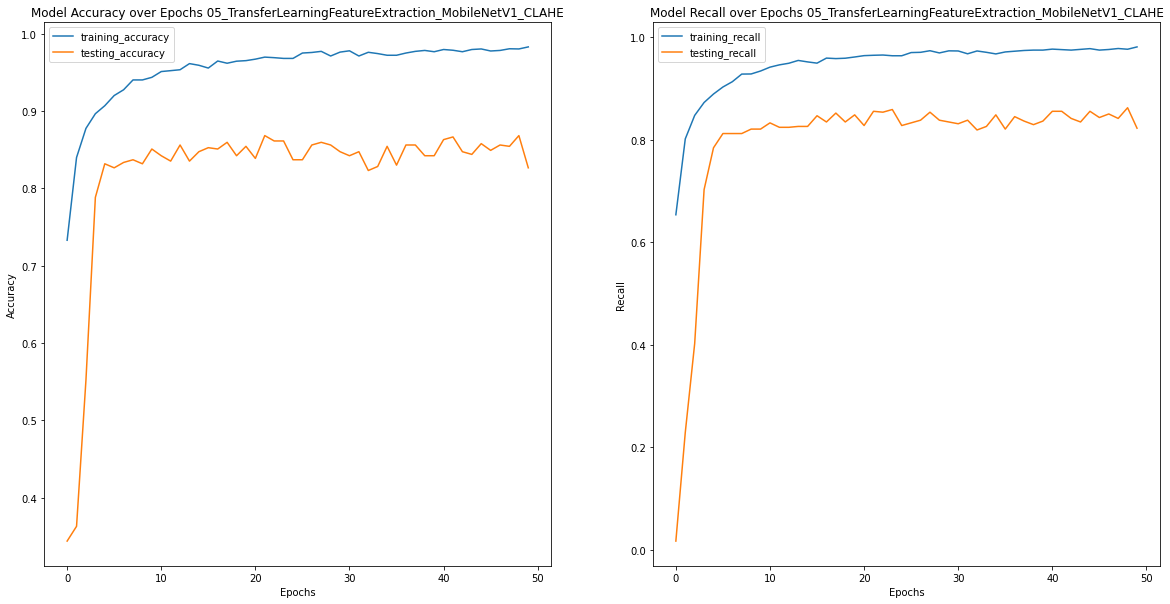

In [11]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_CLAHE/results/classificationReport/05_TransferLearningFeatureExtraction_MobileNetV1_CLAHE.csv")
# Save model and training history
historyPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_CLAHE/history/05_TransferLearningFeatureExtraction_MobileNetV1_CLAHE.npy"
save_history1(TransferLearningFeatureExtraction_MobileNetV1_CLAHE_history, historyPath)
# Load and plot model training history
history = load_history(historyPath)
plot_history(history, "05_TransferLearningFeatureExtraction_MobileNetV1_CLAHE", location = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_CLAHE/history/05_TransferLearningFeatureExtraction_MobileNetV1_CLAHE.jpg")

### 05_TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE: Transfer Learning with MobileNetV1 model on MULTISCALE Image

#### Dataset Loading 

In [12]:
# Defining path of dataset
train_path = "/Dataset/Dataset_MULTISCALE/train"
test_path = "/Dataset/Dataset_MULTISCALE/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [13]:
# Create MobileNetV1 
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
# Model summary
TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE.summary()
# Train model 
checkpointPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE.ckpt"
TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE_history = trainModel(TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 1000)             4253864   
 nal)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 1000)              1001000   
                                                                 
 batch_normalization_13 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                           

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 4s 7ms/step
Confusion Matrix:


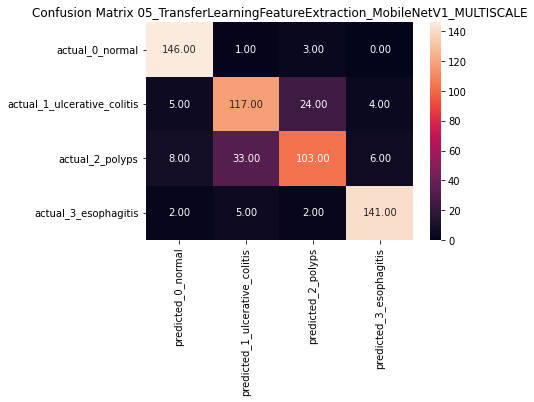

In [14]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE.ckpt"
loadModel(TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE, test_data, "05_TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE" ,
                                                                data_class = ["0_normal_MULTISCALE",
                                                                              "1_ulcerative_colitis_MULTISCALE",
                                                                              "2_polyps_MULTISCALE",
                                                                              "3_esophagitis_MULTISCALE"],
                                                                location = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE/results/confusionMatrix/05_TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE.jpg")

INFO:tensorflow:Assets written to: ram://44548663-7dff-40d8-a516-ee834f634cd8/assets


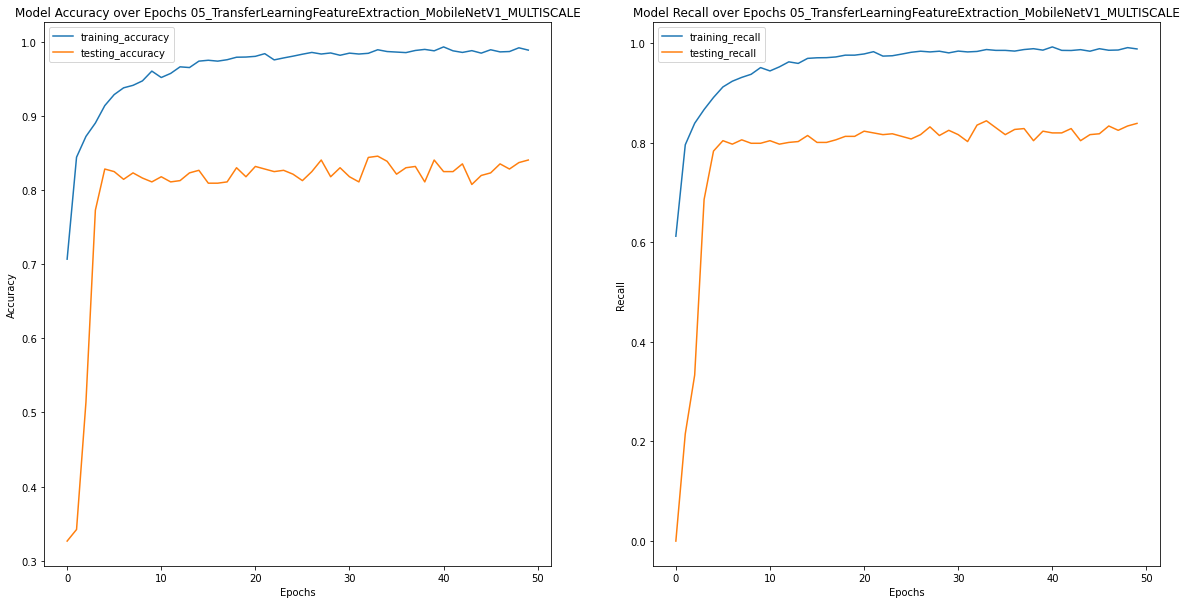

In [15]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE/results/classificationReport/05_TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE.csv")
# Save model training history
historyPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE/history/05_TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE.npy"
save_history1(TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE_history, historyPath)
# Load and plot model training history
history = load_history(historyPath)
plot_history(history, "05_TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE", location = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE/history/05_TransferLearningFeatureExtraction_MobileNetV1_MULTISCALE.jpg")

### 05_TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH: Transfer Learning with MobileNetV1 model on RAYLEIGH Image

#### Dataset Loading 

In [16]:
# Defining path of dataset
train_path = "/Dataset/Dataset_RAYLEIGH/train"
test_path = "/Dataset/Dataset_RAYLEIGH/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [17]:
# Create MobileNetV1 
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
# Model summary
TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH.summary()
# Train model 
checkpointPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH.ckpt"
TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH_history = trainModel(TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 1000)             4253864   
 nal)                                                            
                                                                 
 batch_normalization_18 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 1000)              1001000   
                                                                 
 batch_normalization_19 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                           

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 4s 7ms/step
Confusion Matrix:


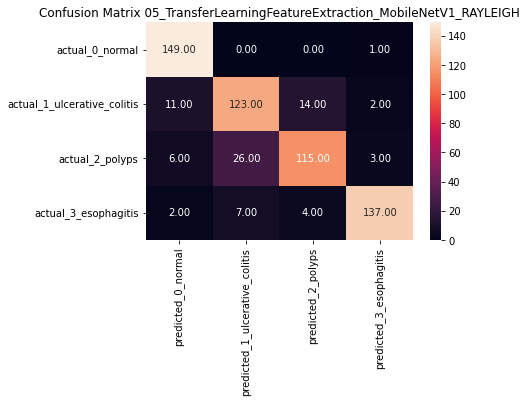

In [18]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH.ckpt"
loadModel(TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH, test_data, "05_TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH" ,
                                                                data_class = ["0_normal_RAYLEIGH",
                                                                              "1_ulcerative_colitis_RAYLEIGH",
                                                                              "2_polyps_RAYLEIGH",
                                                                              "3_esophagitis_RAYLEIGH"],
                                                                location = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH/results/confusionMatrix/05_TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH.jpg")

INFO:tensorflow:Assets written to: ram://fe746671-ee39-44c8-b7e6-ede6703c4ff9/assets


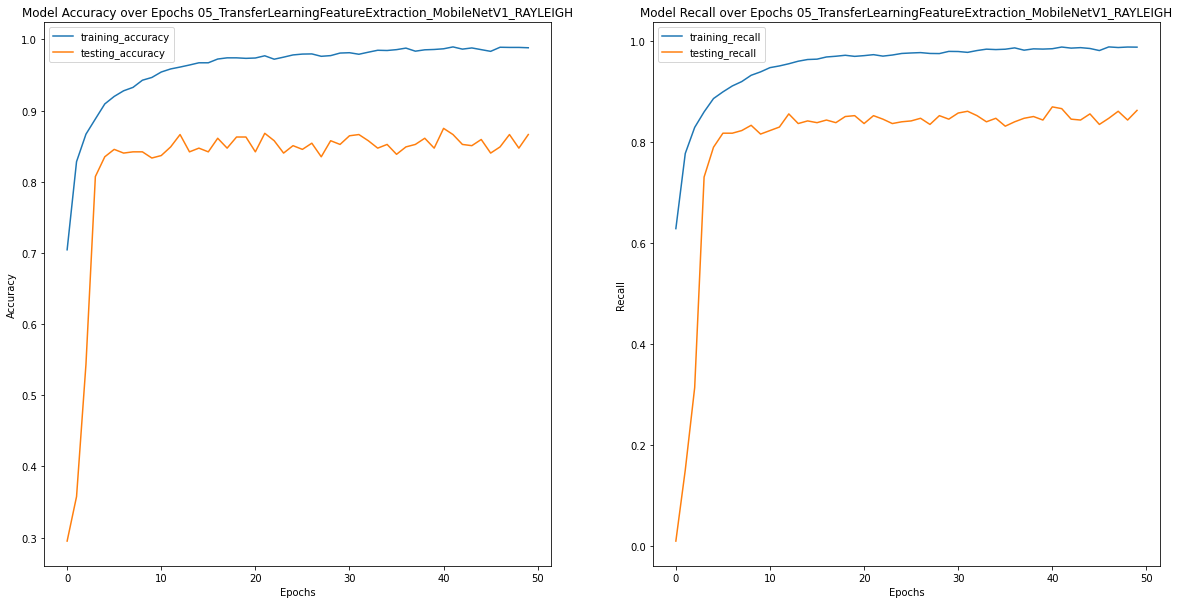

In [19]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH/results/classificationReport/05_TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH.csv")
# Save model training history
historyPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH/history/05_TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH.npy"
save_history1(TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH_history, historyPath)
# Load and plot model training history
history = load_history(historyPath)
plot_history(history, "05_TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH", location = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH/history/05_TransferLearningFeatureExtraction_MobileNetV1_RAYLEIGH.jpg")

### 05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL: Transfer Learning with MobileNetV1 model on NORMAL Image (Optimizer - Adam)

#### Dataset Loading

In [20]:
# Defining path of dataset
train_path = "/Dataset/Dataset_NORMAL/train"
test_path = "/Dataset/Dataset_NORMAL/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [21]:
# Create MobileNetV1 
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
# Model summary
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam.summary()
# Train model
checkpointPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam.ckpt"
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam_history = trainModel(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 1000)             4253864   
 nal)                                                            
                                                                 
 batch_normalization_24 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_16 (Dense)            (None, 1000)              1001000   
                                                                 
 batch_normalization_25 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                           

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 6s 9ms/step
Confusion Matrix:


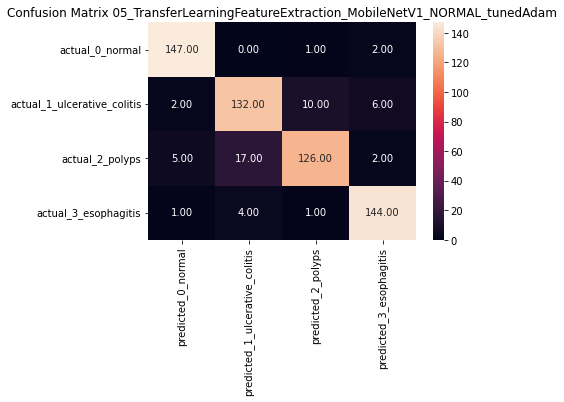

In [22]:
# Load best model from checkpoint folder
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam.ckpt"
loadModel(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam, test_data, "05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam/results/confusionMatrix/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam.jpg")

INFO:tensorflow:Assets written to: ram://4d47d038-85f2-4e64-afe4-f1c59c1502ac/assets


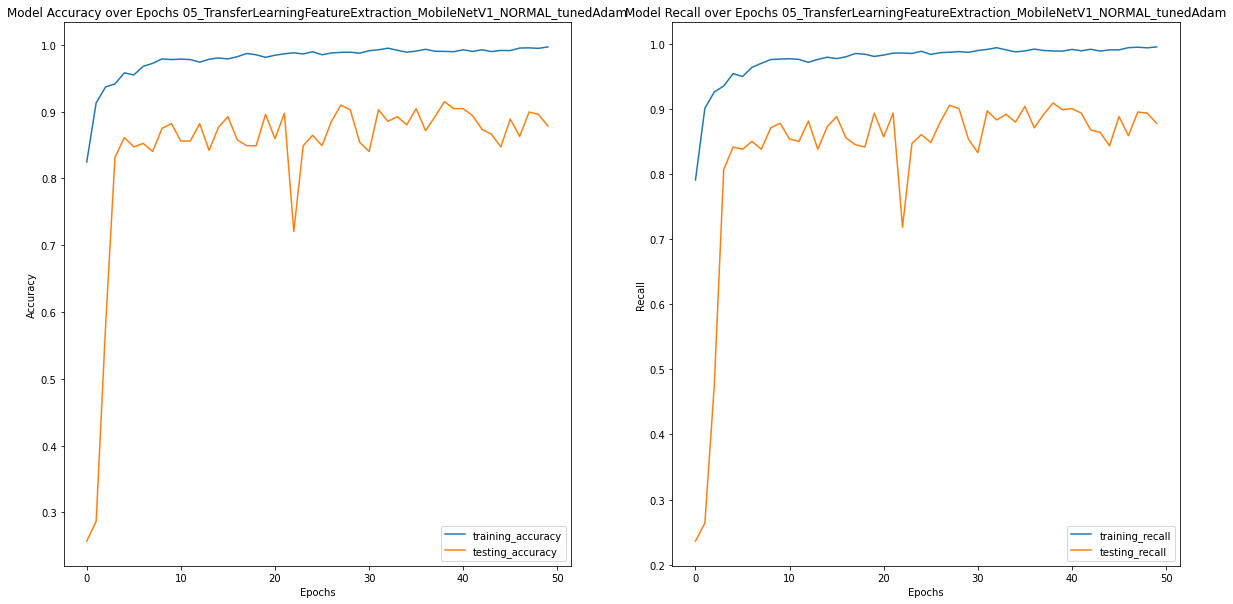

In [23]:
# Save results
saveResults_csv(df_results,"TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam/results/classificationReport/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam.csv")
# Save model training history
historyPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam/history/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam.npy"
save_history1(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam_history, historyPath)
# Load and plot model training history
history = history = load_history(historyPath)
plot_history(history, "05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam", location = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam/history/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdam.jpg")

### 05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL: Transfer Learning with MobileNetV1 model on NORMAL Image (Optimizer - LrScheduler)

#### Dataset Loading

In [24]:
# Defining path of dataset
train_path = "/Dataset/Dataset_NORMAL/train"
test_path = "/Dataset/Dataset_NORMAL/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [25]:
# Create MobileNetV1 
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
# Model summary
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler.summary()
# Train model
checkpointPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler.ckpt"
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler_history = trainModelLrScheduler(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 1000)             4253864   
 nal)                                                            
                                                                 
 batch_normalization_30 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_20 (Dense)            (None, 1000)              1001000   
                                                                 
 batch_normalization_31 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                          

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 6s 9ms/step
Confusion Matrix:


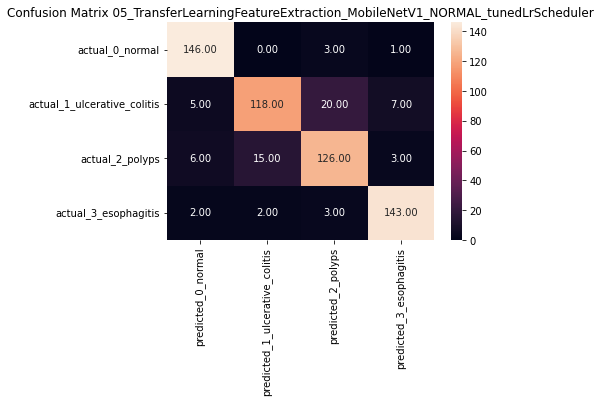

In [26]:
# Load best model
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler.ckpt"
loadModel(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler, test_data, "05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler/results/confusionMatrix/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler.jpg")

INFO:tensorflow:Assets written to: ram://0b061449-30b4-4ff8-a26e-e773ef69f978/assets


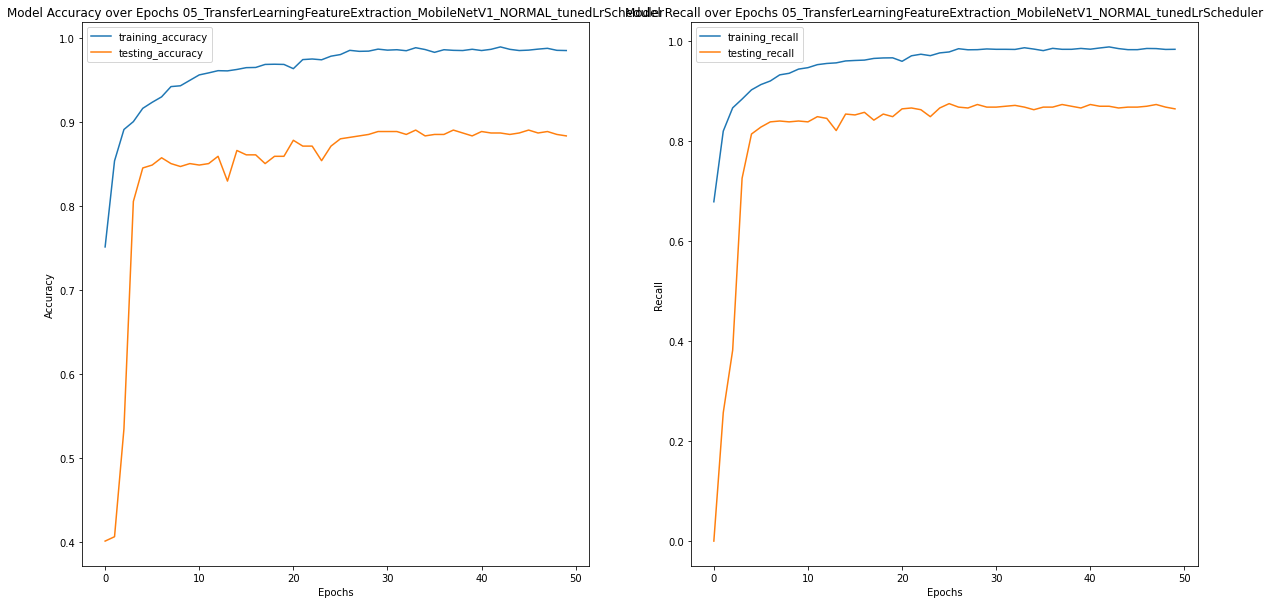

In [27]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler/results/classificationReport/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler.csv")
# Save model training history
historyPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler/history/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler.npy"
save_history1(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler_history, historyPath)
# Load and plot model training history
history = history = load_history(historyPath)
plot_history(history, "05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler", location = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler/history/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedLrScheduler.jpg")

### 05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL: Transfer Learning with MobileNetV1 model on NORMAL Image (Optimizer - Adam + LrScheduler)

#### Dataset Loading 

In [28]:
# Defining path of dataset
train_path = "/Dataset/Dataset_NORMAL/train"
test_path = "/Dataset/Dataset_NORMAL/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 4200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [29]:
# Create MobileNetV1 
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
# Model summary
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.summary()
# Train model
checkpointPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.ckpt"
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler_history = trainModelLrScheduler(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler, train_data, valid_data, checkpointPath ,epochs = 50)

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 1000)             4253864   
 nal)                                                            
                                                                 
 batch_normalization_36 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_24 (Dense)            (None, 1000)              1001000   
                                                                 
 batch_normalization_37 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                          

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 6s 9ms/step
Confusion Matrix:


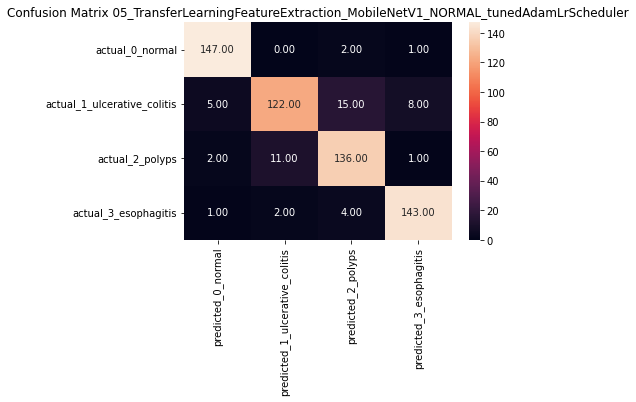

In [30]:
# Load best model 
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/checkpoint/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler,checkpointPath)
# Generate results for validation and save
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler, test_data, "05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/results/confusionMatrix/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.jpg")

INFO:tensorflow:Assets written to: ram://3c8416b6-e4ce-4239-ba97-2aa1ce248688/assets


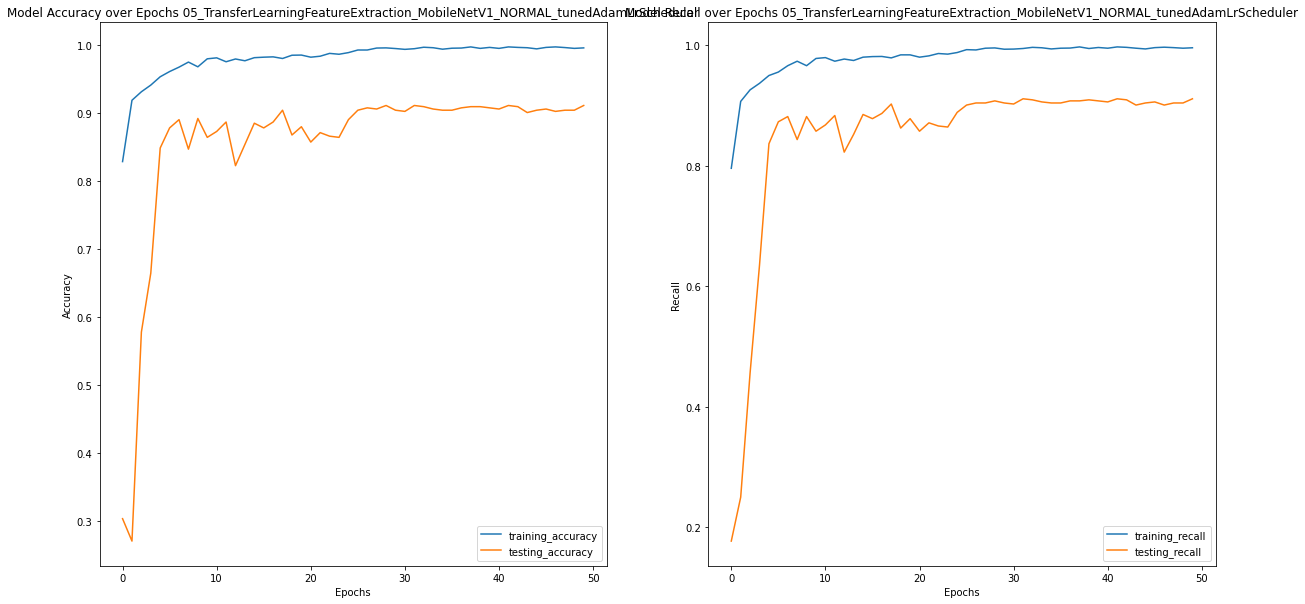

In [31]:
# Save results csv
saveResults_csv(df_results,"TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/results/classificationReport/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.csv")
# Save model training history
historyPath = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/history/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.npy"
save_history1(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler_history, historyPath)
# Load and plot model training history
history = history = load_history(historyPath)
plot_history(history, "05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler", location = "TrainedResults/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/history/05_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.jpg")